Step 1: Import Data


In [7]:
data_path = '/content/drive/MyDrive/dataset - strawberry leaves'

In [8]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

Step 2: Data Preprocessing

In [9]:
img_width, img_height = 128, 128

def load_data(data_path):
    X = []
    y = []
    labels = {'healthy': 0, 'Calciumdeficiency': 1}

    for label in labels:
        folder_path = os.path.join(data_path, label)
        for img_file in os.listdir(folder_path):
            img = load_img(os.path.join(folder_path, img_file), target_size=(img_width, img_height))
            img_array = img_to_array(img)
            X.append(img_array)
            y.append(labels[label])

    X = np.array(X)
    y = np.array(y)

    # Normalize image data to values between 0 and 1
    X = X.astype('float32') / 255.0

    # One-hot encode the labels
    y = to_categorical(y, num_classes=2)

    return X, y

X, y = load_data(data_path)



Step 3: Model Building

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

Step 4: Model Training

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)


Epoch 1/10
33/33 [==============================] - 42s 1s/step - loss: 0.7644 - accuracy: 0.5850 - val_loss: 0.5891 - val_accuracy: 0.5652
Epoch 2/10
33/33 [==============================] - 42s 1s/step - loss: 0.5076 - accuracy: 0.7590 - val_loss: 0.6783 - val_accuracy: 0.5652
Epoch 3/10
33/33 [==============================] - 46s 1s/step - loss: 0.4374 - accuracy: 0.8163 - val_loss: 0.3667 - val_accuracy: 0.8609
Epoch 4/10
33/33 [==============================] - 42s 1s/step - loss: 0.3674 - accuracy: 0.8503 - val_loss: 0.3327 - val_accuracy: 0.8522
Epoch 5/10
33/33 [==============================] - 40s 1s/step - loss: 0.2997 - accuracy: 0.8824 - val_loss: 0.2745 - val_accuracy: 0.9043
Epoch 6/10
33/33 [==============================] - 41s 1s/step - loss: 0.2697 - accuracy: 0.8921 - val_loss: 0.2483 - val_accuracy: 0.8870
Epoch 7/10
33/33 [==============================] - 42s 1s/step - loss: 0.2254 - accuracy: 0.9077 - val_loss: 0.2467 - val_accuracy: 0.8783
Epoch 8/10
33/33 [==

Step 5: Model Evaluation

Epoch 1/10
36/36 [==============================] - 65s 2s/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.1174 - val_accuracy: 0.9734
Epoch 2/10
36/36 [==============================] - 67s 2s/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.1273 - val_accuracy: 0.9686
Epoch 3/10
36/36 [==============================] - 72s 2s/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.1044 - val_accuracy: 0.9748
Epoch 4/10
36/36 [==============================] - 65s 2s/step - loss: 0.0074 - accuracy: 0.9974 - val_loss: 0.1111 - val_accuracy: 0.9762
Epoch 5/10
36/36 [==============================] - 68s 2s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1337 - val_accuracy: 0.9783
Epoch 6/10
36/36 [==============================] - 63s 2s/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.1631 - val_accuracy: 0.9672
Epoch 7/10
36/36 [==============================] - 63s 2s/step - loss: 0.0487 - accuracy: 0.9843 - val_loss: 0.1099 - val_accuracy: 0.9734
Epoch 8/10
36/36 [==

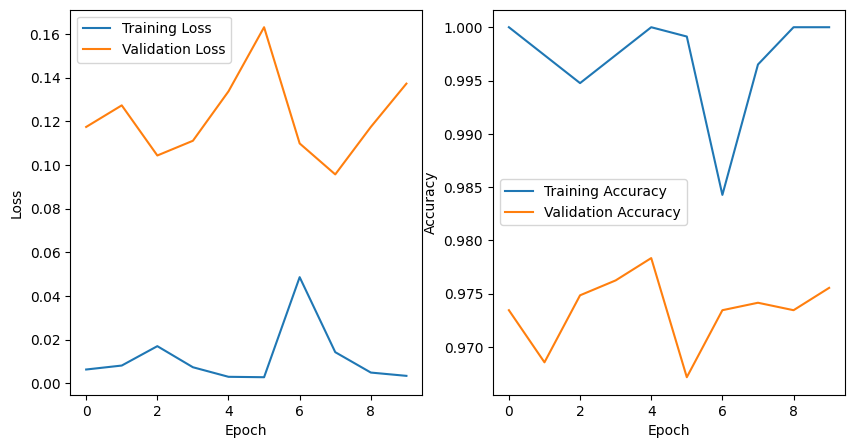

In [27]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X, y))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Plot training history using the function
plot_training_history(history)


Step 6: Prediction according to  image



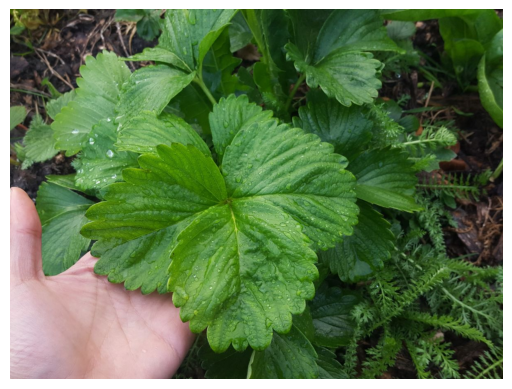

1/1 [==============================] - 0s 78ms/step
The predicted status of the leaf is: Healthy


In [19]:
def predict_leaf_status(model, image_path):
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0

    prediction = model.predict(img_array)[0]

    if prediction[0] > prediction[1]:
        return "Healthy"
    else:
        return "Calcium Deficient"

# Provide the path to the image you want to test
image_path = '/content/test.jpg'

# Load and display the image
img = load_img(image_path)
plt.imshow(img)
plt.axis('off')  # Hide the axis values
plt.show()

prediction_result = predict_leaf_status(model, image_path)
print(f"The predicted status of the leaf is: {prediction_result}")


Prediction for Calcium diefficient image

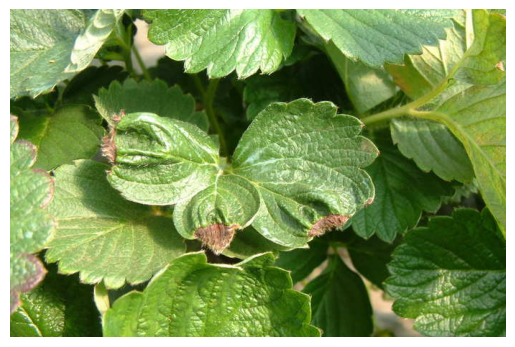

1/1 [==============================] - 0s 58ms/step
The predicted status of the leaf is: Calcium Deficient


In [24]:
image_path = '/content/test5.jpg'

# Load and display the image
img = load_img(image_path)
plt.imshow(img)
plt.axis('off')  # Hide the axis values
plt.show()

prediction_result = predict_leaf_status(model, image_path)
print(f"The predicted status of the leaf is: {prediction_result}")